# Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score,make_scorer, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV ,GridSearchCV
from sklearn import metrics
from sklearn.svm import SVR

# Data Collection & Analysis

In [2]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [3]:
# first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [5]:
# getting more informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:
- Sex
- Smoker
- Region

In [6]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

# Data Analysis

In [7]:
# get more statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


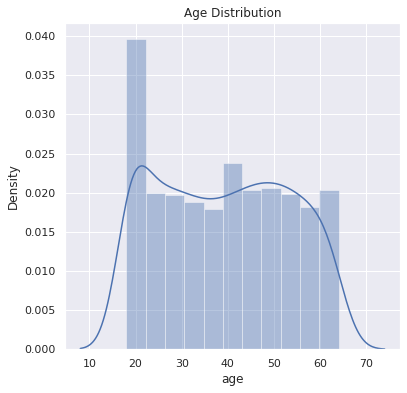

In [8]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

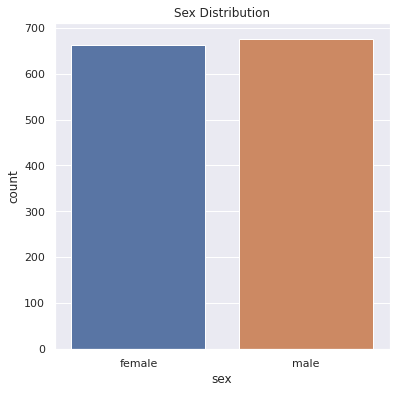

In [9]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [10]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


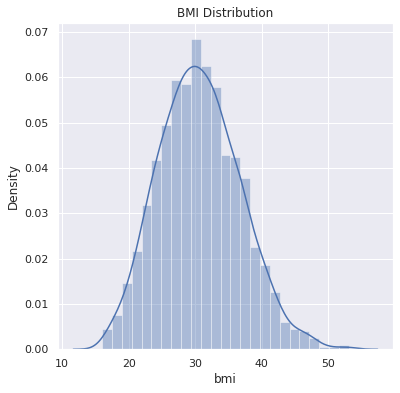

In [11]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

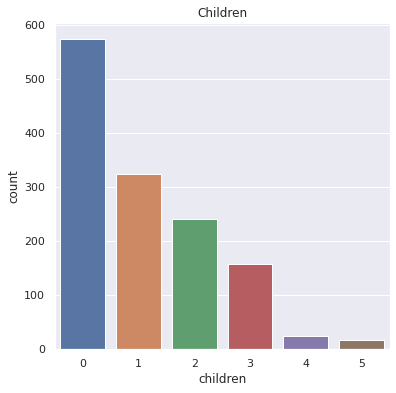

In [12]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [13]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

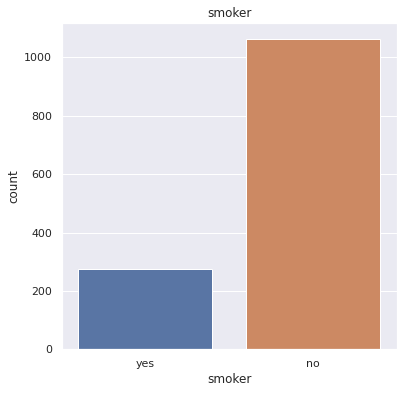

In [14]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [15]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

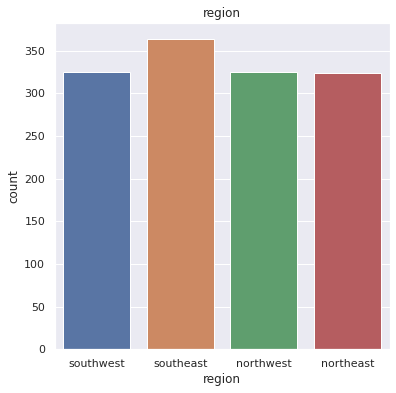

In [16]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [17]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


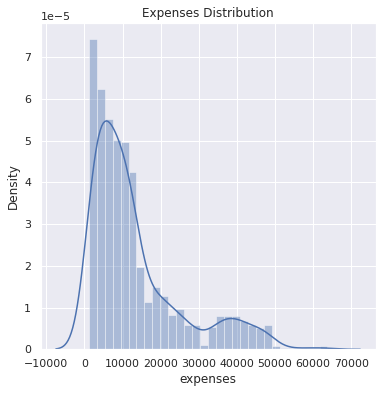

In [18]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['expenses'])
plt.title('Expenses Distribution')
plt.show()

# Data Pre-Processing

## Encoding the categorical features

In [19]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

## Splitting the Features and Target

In [20]:
X = insurance_dataset.drop(columns='expenses', axis=1)
Y = insurance_dataset['expenses']

## Splitting the data into Training data & Testing Data

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Model training

## Model 1: Linear Regression

In [23]:
# loading the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Linear Regression Evaluation

### Train Data

In [24]:
# prediction on training data
training_data_prediction_LR =regressor.predict(X_train)

# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction_LR)
print('R squared vale : ', r2_train)

print(f'MAE : {mean_absolute_error(Y_train, training_data_prediction_LR)}')
print(f'MSE : {mean_squared_error(Y_train, training_data_prediction_LR)}')
print(f'RMSE : {np.sqrt(mean_squared_error(Y_train,training_data_prediction_LR))}')

R squared vale :  0.7515233180624387
MAE : 4150.271508686156
MSE : 36172405.67283648
RMSE : 6014.349979244347


### Test Data

In [25]:
# prediction on test data
test_data_prediction_LR =regressor.predict(X_test)

# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction_LR)
print('R squared vale : ', r2_test)

print(f'MAE : {mean_absolute_error(Y_test, test_data_prediction_LR)}')
print(f'MSE : {mean_squared_error(Y_test, test_data_prediction_LR)}')
print(f'RMSE : {np.sqrt(mean_squared_error(Y_test,test_data_prediction_LR))}')

R squared vale :  0.7447382074449773
MAE : 4267.4834093785175
MSE : 38335409.4859106
RMSE : 6191.5595358447945


## Model 2 :  DecisionTree Regression

In [26]:
DTR = DecisionTreeRegressor()
DTR.fit(X_train, Y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

## Decision Tree Regression Evaluation

### Training data





In [27]:
# prediction on training data
training_data_prediction_DTR =DTR.predict(X_train)

# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction_DTR)
print('R squared vale : ', r2_train)

print(f'MAE : {mean_absolute_error(Y_train, training_data_prediction_DTR)}')
print(f'MSE : {mean_squared_error(Y_train, training_data_prediction_DTR)}')
print(f'RMSE : {np.sqrt(mean_squared_error(Y_train,training_data_prediction_DTR))}')

R squared vale :  1.0
MAE : 0.0
MSE : 0.0
RMSE : 0.0


### Test Data

In [28]:
# prediction on test data
test_data_prediction_DTR =DTR.predict(X_test)

# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction_DTR)
print('R squared vale : ', r2_test)

print(f'MAE : {mean_absolute_error(Y_test, test_data_prediction_DTR)}')
print(f'MSE : {mean_squared_error(Y_test, test_data_prediction_DTR)}')
print(f'RMSE : {np.sqrt(mean_squared_error(Y_test,test_data_prediction_DTR))}')

R squared vale :  0.6864987639641615
MAE : 3340.364216417911
MSE : 47081853.25143172
RMSE : 6861.621765401509


## Model 3 : Random Forest Regressor

In [29]:
RFR = RandomForestRegressor()
RFR.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## Random Forest Regression Evaluation

### Train Data

In [30]:
# prediction on training data
training_data_prediction_RTR =RFR.predict(X_train)

# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction_RTR)
print('R squared vale : ', r2_train)

print(f'MAE : {mean_absolute_error(Y_train, training_data_prediction_RTR)}')
print(f'MSE : {mean_squared_error(Y_train, training_data_prediction_RTR)}')
print(f'RMSE : {np.sqrt(mean_squared_error(Y_train,training_data_prediction_RTR))}')

R squared vale :  0.9781981704585614
MAE : 980.1052105607478
MSE : 3173837.5465795957
RMSE : 1781.526745962461


### Test  Data

In [31]:
# prediction on test data
test_data_prediction_RFR =RFR.predict(X_test)

# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction_RFR)
print('R squared vale : ', r2_test)

print(f'MAE : {mean_absolute_error(Y_test, test_data_prediction_RFR)}')
print(f'MSE : {mean_squared_error(Y_test, test_data_prediction_RFR)}')
print(f'RMSE : {np.sqrt(mean_squared_error(Y_test,test_data_prediction_RFR))}')

R squared vale :  0.8345765558151016
MAE : 2722.148102611941
MSE : 24843418.233188212
RMSE : 4984.317228386272


## Model 4 : XG BOOSTING

In [32]:
XGB = XGBRegressor()
XGB.fit(X_train, Y_train)

[14:36:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

## XGBoosting Model Evaluation

### Train Data

In [33]:
# prediction on training data
training_data_prediction_XGB =XGB.predict(X_train)

# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction_XGB)
print('R squared vale : ', r2_train)

print(f'MAE : {mean_absolute_error(Y_train, training_data_prediction_XGB)}')
print(f'MSE : {mean_squared_error(Y_train, training_data_prediction_XGB)}')
print(f'RMSE : {np.sqrt(mean_squared_error(Y_train,training_data_prediction_XGB))}')

R squared vale :  0.8970798708259715
MAE : 2117.24810792841
MSE : 14982768.746562686
RMSE : 3870.7581617252563


### Test Data

In [34]:
# prediction on test data
test_data_prediction_XGB =XGB.predict(X_test)

# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction_XGB)
print('R squared vale : ', r2_test)

print(f'MAE : {mean_absolute_error(Y_test, test_data_prediction_XGB)}')
print(f'MSE : {mean_squared_error(Y_test, test_data_prediction_XGB)}')
print(f'RMSE : {np.sqrt(mean_squared_error(Y_test,test_data_prediction_XGB))}')

R squared vale :  0.8666347132874535
MAE : 2409.069896969012
MSE : 20028899.844967198
RMSE : 4475.365889507493


## Model 5 : K Nearest Neighours

In [35]:
KNN = KNeighborsRegressor()
KNN.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

## KNN Model Evalution

### Train Data

In [36]:
# prediction on training data
training_data_prediction_KNN =KNN.predict(X_train)

# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction_KNN)
print('R squared vale : ', r2_train)

print(f'MAE : {mean_absolute_error(Y_train, training_data_prediction_KNN)}')
print(f'MSE : {mean_squared_error(Y_train, training_data_prediction_KNN)}')
print(f'RMSE : {np.sqrt(mean_squared_error(Y_train,training_data_prediction_KNN))}')

R squared vale :  0.39709407681646147
MAE : 6414.838981308411
MSE : 87769031.14567155
RMSE : 9368.512749933767


### Test Data

In [37]:
# prediction on test data
test_data_prediction_KNN =KNN.predict(X_test)

# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction_KNN)
print('R squared vale : ', r2_test)

print(f'MAE : {mean_absolute_error(Y_test, test_data_prediction_KNN)}')
print(f'MSE : {mean_squared_error(Y_test, test_data_prediction_KNN)}')
print(f'RMSE : {np.sqrt(mean_squared_error(Y_test,test_data_prediction_KNN))}')

R squared vale :  0.045793537556784614
MAE : 8579.099097014927
MSE : 143303449.78666523
RMSE : 11970.94189220987


## Model 6 : Support Vector Regressor

In [38]:
SVR = SVR()
SVR.fit(X_train, Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Train Data

In [39]:
# prediction on training data
training_data_prediction_SVR =SVR.predict(X_train)

# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction_SVR)
print('R squared vale : ', r2_train)

print(f'MAE : {mean_absolute_error(Y_train, training_data_prediction_SVR)}')
print(f'MSE : {mean_squared_error(Y_train, training_data_prediction_SVR)}')
print(f'RMSE : {np.sqrt(mean_squared_error(Y_train,training_data_prediction_SVR))}')


R squared vale :  -0.11104190258235747
MAE : 8270.57054632814
MSE : 161741770.31963122
RMSE : 12717.773795740795


### Test Data

In [40]:
# prediction on test data
test_data_prediction_SVR =SVR.predict(X_test)

# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction_SVR)
print('R squared vale : ', r2_test)

print(f'MAE : {mean_absolute_error(Y_test, test_data_prediction_SVR)}')
print(f'MSE : {mean_squared_error(Y_test, test_data_prediction_SVR)}')
print(f'RMSE : {np.sqrt(mean_squared_error(Y_test,test_data_prediction_SVR))}')

R squared vale :  -0.08038023131684624
MAE : 8467.074839421079
MSE : 162252322.03165138
RMSE : 12737.830350246128


## Result

In [41]:
Result = pd.DataFrame({'Model' : ['Linear Regression', 'DecisionTreeRegressor', 'RandomForestRegressor', 'XGBoost', 'KNN', 'SVR'],
                       'R2_Score' : [r2_score(Y_test, test_data_prediction_LR),r2_score(Y_test, test_data_prediction_DTR),r2_score(Y_test, test_data_prediction_RFR),r2_score(Y_test, test_data_prediction_XGB), r2_score(Y_test, test_data_prediction_KNN),r2_score(Y_test, test_data_prediction_SVR) ],
                      'Mean_Absolute_Error'  : [mean_absolute_error(Y_test, test_data_prediction_LR),mean_absolute_error(Y_test, test_data_prediction_DTR),mean_absolute_error(Y_test, test_data_prediction_RFR),mean_absolute_error(Y_test, test_data_prediction_XGB), mean_absolute_error(Y_test,test_data_prediction_KNN), mean_absolute_error(Y_test, test_data_prediction_SVR)],
                       'Mean_Squared_Error' : [mean_squared_error(Y_test, test_data_prediction_LR),mean_squared_error(Y_test, test_data_prediction_DTR),mean_squared_error(Y_test, test_data_prediction_RFR),mean_squared_error(Y_test, test_data_prediction_XGB), mean_squared_error(Y_test,test_data_prediction_KNN), mean_squared_error(Y_test, test_data_prediction_SVR)],
                       'Root_MSE' : [np.sqrt(mean_squared_error(Y_test, test_data_prediction_LR)),np.sqrt(mean_squared_error(Y_test, test_data_prediction_DTR)),np.sqrt(mean_squared_error(Y_test, test_data_prediction_RFR)),np.sqrt(mean_squared_error(Y_test, test_data_prediction_XGB)), np.sqrt(mean_squared_error(Y_test,test_data_prediction_KNN)), np.sqrt(mean_squared_error(Y_test, test_data_prediction_SVR))]})

In [42]:
Result

,Model,R2_Score,Mean_Absolute_Error,Mean_Squared_Error,Root_MSE
0,Linear Regression,0.744738,4267.483409,3.833541e+07,6191.559536
1,DecisionTreeRegressor,0.686499,3340.364216,4.708185e+07,6861.621765
2,RandomForestRegressor,0.834577,2722.148103,2.484342e+07,4984.317228
3,XGBoost,0.866635,2409.069897,2.002890e+07,4475.365890
4,KNN,0.045794,8579.099097,1.433034e+08,11970.941892
5,SVR,-0.080380,8467.074839,1.622523e+08,12737.830350


### Xtreme Gradient Boost Get Good Accuarcy than Other Models

## Test The Model and Predict the Ouput before Hyperparmeter  Tuning

In [43]:
input_data = (19,1,27.9,0,0,1)
print(input_data)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
print(input_data_as_numpy_array)
# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshaped)

prediction_LR= regressor.predict(input_data_reshaped)
prediction_DTR= DTR.predict(input_data_reshaped)
prediction_RFR= RFR.predict(input_data_reshaped)
# prediction_XGB= XGB.predict(input_data_reshaped)
prediction_KNN= KNN.predict(input_data_reshaped)




print('The insurance cost predict by Using LR Model :', prediction_LR[0])
print('The insurance cost predict by Using DT Model :', prediction_DTR[0])
print('The insurance cost predict by Using RF Model :', prediction_RFR[0])
# print('The insurance cost predict by Using XGB Model :', prediction_XGB[0])
print('The insurance cost predict by Using KNN Model :', prediction_KNN[0])

(19, 1, 27.9, 0, 0, 1)
[19.   1.  27.9  0.   0.   1. ]
[[19.   1.  27.9  0.   0.   1. ]]
The insurance cost predict by Using LR Model : 25596.164348496022
The insurance cost predict by Using DT Model : 16884.92
The insurance cost predict by Using RF Model : 16887.532699999992
The insurance cost predict by Using KNN Model : 10651.894


# Hyperparameter Techiques

In [44]:
params_DTR= {  'max_depth':[2, 3, 5],
                'min_samples_split':[2,5,10,15,20,25]}

params_RFR= {'n_estimators':[100,500,1000],
                'max_features':['log2', 'sqrt', 'auto'],
                'max_depth':[2, 3, 5],
                'min_samples_split':[2,5,10,15,20,25],
                'min_samples_leaf':[1,2,4,6,8,10]}

params_XGB= {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

params_KNN= {'n_neighbors':list(range(2,20,2)),
              'weights':['uniform', 'distance'],
              'leaf_size':list(range(1,5)),
              'p':[1,2]}

params_SVR= {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
             'degree':[1,2,3,4,5,6,7],
             'gamma':['scale', 'auto'],
             'C':[1, 10, 100, 1000, 10000]}


In [45]:
# grid_svr= GridSearchCV(estimator=SVR, param_grid=params_SVR, cv=5, n_jobs=-1, scoring=make_scorer(r2_score))
# grid_svr.fit(X_train,Y_train)
# print(f'{SVR}: ')
# print('-'.center(20,'-'))
# print(f'r2 score :{grid_svr.best_score_}')
# print(f'Best Parameter :{grid_svr.best_params_}')

# print('-----------------------------------')

# # after hyper tuning

# # prediction on training data
# training_data_prediction_GridSVR =grid_dt.predict(X_train)

# # R squared value
# r2_train = metrics.r2_score(Y_train, training_data_prediction_GridSVR)
# print('R squared Train value : ', r2_train)

# print(f'MAE : {mean_absolute_error(Y_train, training_data_prediction_GridSVR)}')
# print(f'MSE : {mean_squared_error(Y_train, training_data_prediction_GridSVR)}')
# print(f'RMSE : {np.sqrt(mean_squared_error(Y_train,training_data_prediction_GridSVR))}')


# # prediction on test data
# test_data_prediction_GridSVR =grid_svr.predict(X_test)

# # R squared value
# r2_test = metrics.r2_score(Y_test, test_data_prediction_GridSVR)
# print('R squared Test value : ', r2_test)

# print(f'MAE : {mean_absolute_error(Y_test, test_data_prediction_GridSVR)}')
# print(f'MSE : {mean_squared_error(Y_test, test_data_prediction_GridSVR)}')
# print(f'RMSE : {np.sqrt(mean_squared_error(Y_test,test_data_prediction_GridSVR))}')

In [46]:
grid_dt= GridSearchCV(estimator=DTR, param_grid=params_DTR, cv=5, n_jobs=-1, scoring=make_scorer(r2_score))
grid_dt.fit(X_train,Y_train)
print(f'{DTR}: ')
print('-'.center(20,'-'))
print(f'r2 score :{grid_dt.best_score_}')
print(f'Best Parameter :{grid_dt.best_params_}')

print('-----------------------------------')

# after hyper tuning

# prediction on training data
training_data_prediction_GridDTR =grid_dt.predict(X_train)

# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction_GridDTR)
print('R squared Train value : ', r2_train)

print(f'MAE : {mean_absolute_error(Y_train, training_data_prediction_GridDTR)}')
print(f'MSE : {mean_squared_error(Y_train, training_data_prediction_GridDTR)}')
print(f'RMSE : {np.sqrt(mean_squared_error(Y_train,training_data_prediction_GridDTR))}')


# prediction on test data
test_data_prediction_GridDTR =grid_dt.predict(X_test)

# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction_GridDTR)
print('R squared Test value : ', r2_test)

print(f'MAE : {mean_absolute_error(Y_test, test_data_prediction_GridDTR)}')
print(f'MSE : {mean_squared_error(Y_test, test_data_prediction_GridDTR)}')
print(f'RMSE : {np.sqrt(mean_squared_error(Y_test,test_data_prediction_GridDTR))}')

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best'): 
--------------------
r2 score :0.8360922883192583
Best Parameter :{'max_depth': 3, 'min_samples_split': 2}
-----------------------------------
R squared Train value :  0.856932194728445
MAE : 2792.996910184601
MSE : 20827333.376519784
RMSE : 4563.697336208854
R squared Test value :  0.8512441001487021
MAE : 2773.4431275415013
MSE : 22340273.791720673
RMSE : 4726.549882495759


In [47]:
grid_xgb= GridSearchCV(estimator=XGB, param_grid=params_XGB, cv=5, n_jobs=-1, scoring=make_scorer(r2_score))
grid_xgb.fit(X_train,Y_train)
print(f'{XGB}: ')
print('-'.center(20,'-'))
print(f'r2 score :{grid_xgb.best_score_}')
print(f'Best Parameter :{grid_xgb.best_params_}')

print('-----------------------------------')

# after hyper tuning

# prediction on training data
training_data_prediction_GridXGB =grid_xgb.predict(X_train)

# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction_GridXGB)
print('R squared Train value : ', r2_train)

print(f'MAE : {mean_absolute_error(Y_train, training_data_prediction_GridXGB)}')
print(f'MSE : {mean_squared_error(Y_train, training_data_prediction_GridXGB)}')
print(f'RMSE : {np.sqrt(mean_squared_error(Y_train,training_data_prediction_GridXGB))}')

# prediction on test data
test_data_prediction_GridXGB =grid_xgb.predict(X_test)

# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction_GridXGB)
print('R squared Test value : ', r2_test)

print(f'MAE : {mean_absolute_error(Y_test, test_data_prediction_GridXGB)}')
print(f'MSE : {mean_squared_error(Y_test, test_data_prediction_GridXGB)}')
print(f'RMSE : {np.sqrt(mean_squared_error(Y_test,test_data_prediction_GridXGB))}')


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1): 
--------------------
r2 score :0.8248788206358114
Best Parameter :{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
-----------------------------------
R squared Train value :  0.9437071107327383
MAE : 1632.293168883707
MSE : 8194930.853041312
RMSE : 2862.6789643690945
R squared Test value :  0.839444558289382
MAE : 2867.0347691823476
MSE : 24112337.931815896
RMSE : 4910.43154232048

In [48]:
# grid_rf= GridSearchCV(estimator=RFR, param_grid=params_RFR, cv=5)
# grid_rf.fit(X_train,Y_train)
# print(f'{RFR}: ')
# print('-'.center(20,'-'))
# print(f'r2 score :{grid_rf.best_score_}')
# print(f'Best Parameter :{grid_rf.best_params_}')

In [49]:
grid_knn= GridSearchCV(estimator=KNN, param_grid=params_KNN, cv=5, n_jobs=-1, scoring=make_scorer(r2_score))
grid_knn.fit(X_train,Y_train)
print(f'{KNN}: ')
print('-'.center(20,'-'))
print(f'r2 score :{grid_knn.best_score_}')
print(f'Best Parameter :{grid_knn.best_params_}')

print('-----------------------------------')

# after hyper tuning

# prediction on training data
training_data_prediction_GridKNN =grid_knn.predict(X_train)

# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction_GridKNN)
print('R squared Train value : ', r2_train)

print(f'MAE : {mean_absolute_error(Y_train, training_data_prediction_GridKNN)}')
print(f'MSE : {mean_squared_error(Y_train, training_data_prediction_GridKNN)}')
print(f'RMSE : {np.sqrt(mean_squared_error(Y_train,training_data_prediction_GridKNN))}')

# prediction on test data
test_data_prediction_GridKNN =grid_knn.predict(X_test)

# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction_GridKNN)
print('R squared Test value : ', r2_test)

print(f'MAE : {mean_absolute_error(Y_test, test_data_prediction_GridKNN)}')
print(f'MSE : {mean_squared_error(Y_test, test_data_prediction_GridKNN)}')
print(f'RMSE : {np.sqrt(mean_squared_error(Y_test,test_data_prediction_GridKNN))}')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform'): 
--------------------
r2 score :0.3188280852201705
Best Parameter :{'leaf_size': 2, 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
-----------------------------------
R squared Train value :  1.0
MAE : 0.0
MSE : 0.0
RMSE : 0.0
R squared Test value :  0.34012955759200125
MAE : 6807.070445459437
MSE : 99099843.20080683
RMSE : 9954.890416313323


In [50]:
# for i,j,k in zip([DTR,RFR,XGB,KNN], [params_DTR,params_RFR,params_XGB,params_KNN],['DTR','RFR','XGB','KNN']):
#   grid= GridSearchCV(estimator=i, param_grid=j, cv=5, n_jobs=-1, scoring=make_scorer(r2_score))
#   grid.fit(X_train,Y_train)
#   print(f'{k}= ')
#   print('-'.center(20,'-'))
#   print(f'r2 score :{grid.best_score_}')
#   print(f'Best Parameter :{grid.best_params_}')

## Test The Model and Predict the Ouput after Hyperparmeter  Tuning

In [51]:
input_data = (18,0,33.8,1,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction_GridLR= regressor.predict(input_data_reshaped)
prediction_GridDTR= grid_dt.predict(input_data_reshaped)
# prediction_GridRFR= grid_rf.predict(input_data_reshaped)
# prediction_GridXGB= XGB.predict(input_data_reshaped)
prediction_GridKNN= grid_knn.predict(input_data_reshaped)
# prediction_GridSVR= grid_svr.predict(input_data_reshaped)




print('The insurance cost predict by Using LR Model :', prediction_GridLR[0])
print('The insurance cost predict by Using DT Model :', prediction_GridDTR[0])
# print('The insurance cost predict by Using RF Model :', prediction_GridRFR[0])
# print('The insurance cost predict by Using XGB Model :', prediction_XGB[0])
print('The insurance cost predict by Using KNN Model :', prediction_GridKNN[0])
# print('The insurance cost predict by Using SVR Model :', prediction_GridSVR[0])

The insurance cost predict by Using LR Model : 3710.922852184929
The insurance cost predict by Using DT Model : 6817.5009352518
The insurance cost predict by Using KNN Model : 1725.55


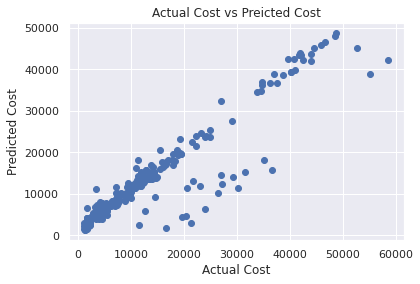

In [80]:
plt.scatter(Y_test, test_data_prediction_XGB)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Actual Cost vs Preicted Cost")
plt.show()

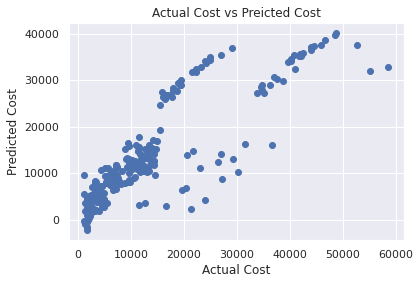

In [81]:
plt.scatter(Y_test, test_data_prediction_LR)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Actual Cost vs Preicted Cost")
plt.show()

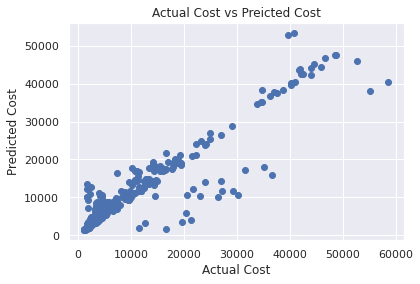

In [82]:
plt.scatter(Y_test, test_data_prediction_RFR)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Actual Cost vs Preicted Cost")
plt.show()

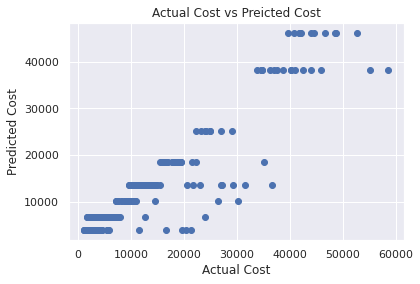

In [83]:
plt.scatter(Y_test, test_data_prediction_GridDTR)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Actual Cost vs Preicted Cost")
plt.show()

## Conclusion

### The Linear Regression Decision Tree, Random Forest & XG Boosting Getting Good Accuracy so we have predict the right amount of premium cost

In [69]:
## Create a Pickle file using serialization 

import pickle
with open("LinearRegressorModel.pkl","wb") as f:
  pickle.dump(regressor, f)

with open("DecisionTreeModel.pkl","wb") as f:
  pickle.dump(grid_dt, f)

with open("RandomForestModel.pkl","wb") as f:
  pickle.dump(RFR, f)

with open("XGBoostModel.pkl","wb") as f:
  pickle.dump(XGB, f)




In [66]:
with open("LinearRegressorModel.pkl","rb") as f:
  regression = pickle.load(f)

with open("DecisionTreeModel.pkl","rb") as f:
  dt = pickle.load(f)

with open("RandomForestModel.pkl","rb") as f:
  rf = pickle.load(f)

with open("XGBoostModel.pkl","rb") as f:
  xgb = pickle.load(f)

In [79]:
input_data = (27,0,32.7,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

ResultLR = regression.predict(input_data_reshaped)
ResultDT = dt.predict(input_data_reshaped)
ResultRF = rf.predict(input_data_reshaped)
# ResultXGB = xgb.predict(input_data_reshaped)

print(ResultLR[0])
print(ResultDT[0])
print(ResultRF[0])
# print(ResultXGB[0])

5029.25129515142
3852.9346354166632
2687.3260999999998
